In [1]:
from fastbook import *

In [2]:
df = pd.read_csv('gnina_score.csv')

In [3]:
import seaborn as sns

In [4]:
df

,ID,SMILES,Kd,IC50,erk_IC50,Affinity,CNN_Pose_Score,CNN_Affinity
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,97.7,124.7,3159.1,-11.04,0.8360,8.641
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,155.7,496.2,8530.0,-10.76,0.5257,8.497
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,294.8,722.9,8193.8,-10.94,0.6343,8.657
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,442.2,434.1,11518.2,-10.70,0.5808,8.573
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,463.5,1867.3,NaN,-10.58,0.5154,8.531
...,...,...,...,...,...,...,...,...
655,paper_23,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)C(CC5)=O)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,750.5,10000.0,-10.47,0.6446,8.832
656,paper_22,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC5(CCCC6)N6CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,12.0,650.0,-11.73,0.6263,8.756
657,paper_35,FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,7.0,97.0,-11.64,0.7044,9.154
658,US_56,OC[C@@H](O)COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cccc2cccc(Cl)c12,13805.3,6024.0,NaN,-10.90,0.7041,8.599


In [7]:
df2 = df.query('IC50 < 10000')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNN_Affinity', ylabel='IC50'>

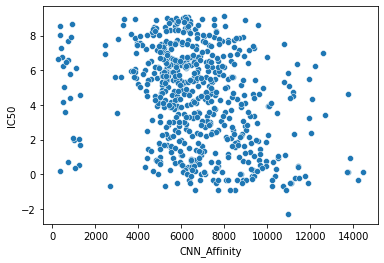

In [10]:
sns.scatterplot(np.exp(df2.CNN_Affinity), np.log(df2.IC50))

In [20]:
df3 = df.query('0<Kd<150000')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNN_Affinity', ylabel='Kd'>

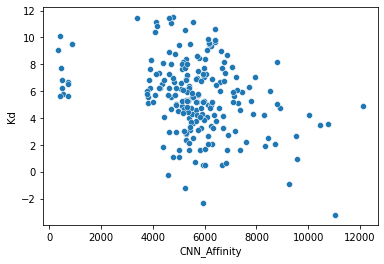

In [21]:
sns.scatterplot(np.exp(df3.CNN_Affinity), np.log(df3.Kd))

In [27]:
df4 = df.query('erk_IC50 < 16666')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


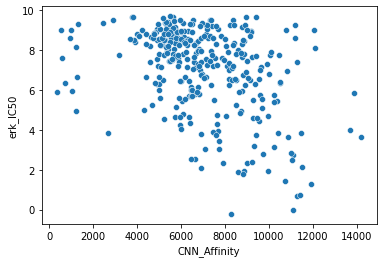

In [29]:
sns.scatterplot(np.exp(df4.CNN_Affinity), np.log(df4.erk_IC50));

In [11]:
from scipy.stats import spearmanr

In [25]:
spearmanr(df2.IC50, df2.CNN_Affinity)

SpearmanrResult(correlation=-0.3085570979044274, pvalue=2.9773466330673846e-15)

In [26]:
spearmanr(df3.Kd, df3.CNN_Affinity)

SpearmanrResult(correlation=-0.28700985870602796, pvalue=2.5160532064864094e-05)

In [30]:
spearmanr(df4.erk_IC50, df4.CNN_Affinity)

SpearmanrResult(correlation=-0.37755900350810656, pvalue=1.8857149598554605e-12)

In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
df

,ID,SMILES,Kd,IC50,erk_IC50,Affinity,CNN_Pose_Score,CNN_Affinity
0,US_1,CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12,97.7,124.7,3159.1,-11.04,0.8360,8.641
1,US_4,Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,155.7,496.2,8530.0,-10.76,0.5257,8.497
2,US_5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,294.8,722.9,8193.8,-10.94,0.6343,8.657
3,US_6,Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12,442.2,434.1,11518.2,-10.70,0.5808,8.573
4,US_7,Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1,463.5,1867.3,NaN,-10.58,0.5154,8.531
...,...,...,...,...,...,...,...,...
655,paper_23,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)C(CC5)=O)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,750.5,10000.0,-10.47,0.6446,8.832
656,paper_22,FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC5(CCCC6)N6CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,12.0,650.0,-11.73,0.6263,8.756
657,paper_35,FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7,NaN,7.0,97.0,-11.64,0.7044,9.154
658,US_56,OC[C@@H](O)COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cccc2cccc(Cl)c12,13805.3,6024.0,NaN,-10.90,0.7041,8.599
